In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-loan-approval/loan_sanction_test.csv
/kaggle/input/home-loan-approval/loan_sanction_train.csv


About Dataset

Problem Statement:

About Company
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

Problem
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

Steps to Follow:

    Problem Statement
    Hypothesis Generation
    Getting the system ready and loading the data
    Understanding the data
    EDA

    Perform Univariate Analysis
    Perform Bivariate Analysis

    Missing value and outlier treatment
    Evaluation Metrics for classification problem
    Model building: part 1 (Apply ML classification algorithms)
    Feature engineering
    Model building: part 2 (Apply ML classification algorithms)


# Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
sns.color_palette("viridis", as_cmap=True)
import matplotlib.pyplot as plt

# Reading the data using pandas

In [3]:
train  = pd.read_csv("/kaggle/input/home-loan-approval/loan_sanction_train.csv")
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Self_Employed column null Distribution

In [8]:
train['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [9]:
train['Self_Employed'] = train['Self_Employed'].fillna('No')

In [10]:
train['Self_Employed'].isnull().sum()

0

### LoanAmount column null Distribution 

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


<Axes: >

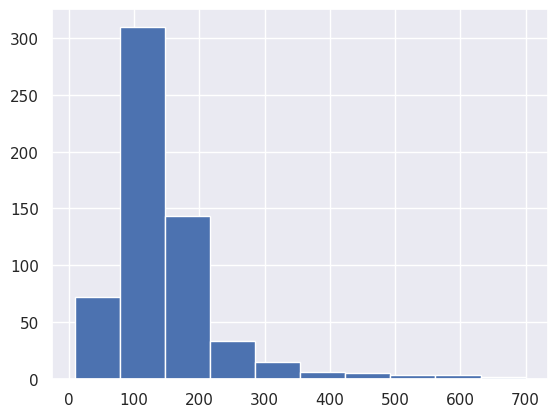

In [11]:
print(train['LoanAmount'].describe())
train['LoanAmount'].hist()

In [12]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [13]:
train['LoanAmount'].isnull().sum()

0

### Credit_History column null Distribution

In [14]:
train['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [15]:
train['Credit_History'] = train['Credit_History'].fillna(1)

In [16]:
train['Credit_History'].isnull().sum()

0

In [17]:
train.dtypes
# categorical columns: Gender , Married  , Dependents , Education   , Self_Employed, Property_Area, Loan_Status
#num data columns: ApplicantIncome,  CoapplicantIncome,   LoanAmount,  Loan_Amount_Term,  Credit_History,    

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
train = train.drop(columns = ['Loan_ID', 'Loan_Amount_Term'])

In [19]:
train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='LoanAmount', ylabel='Count'>

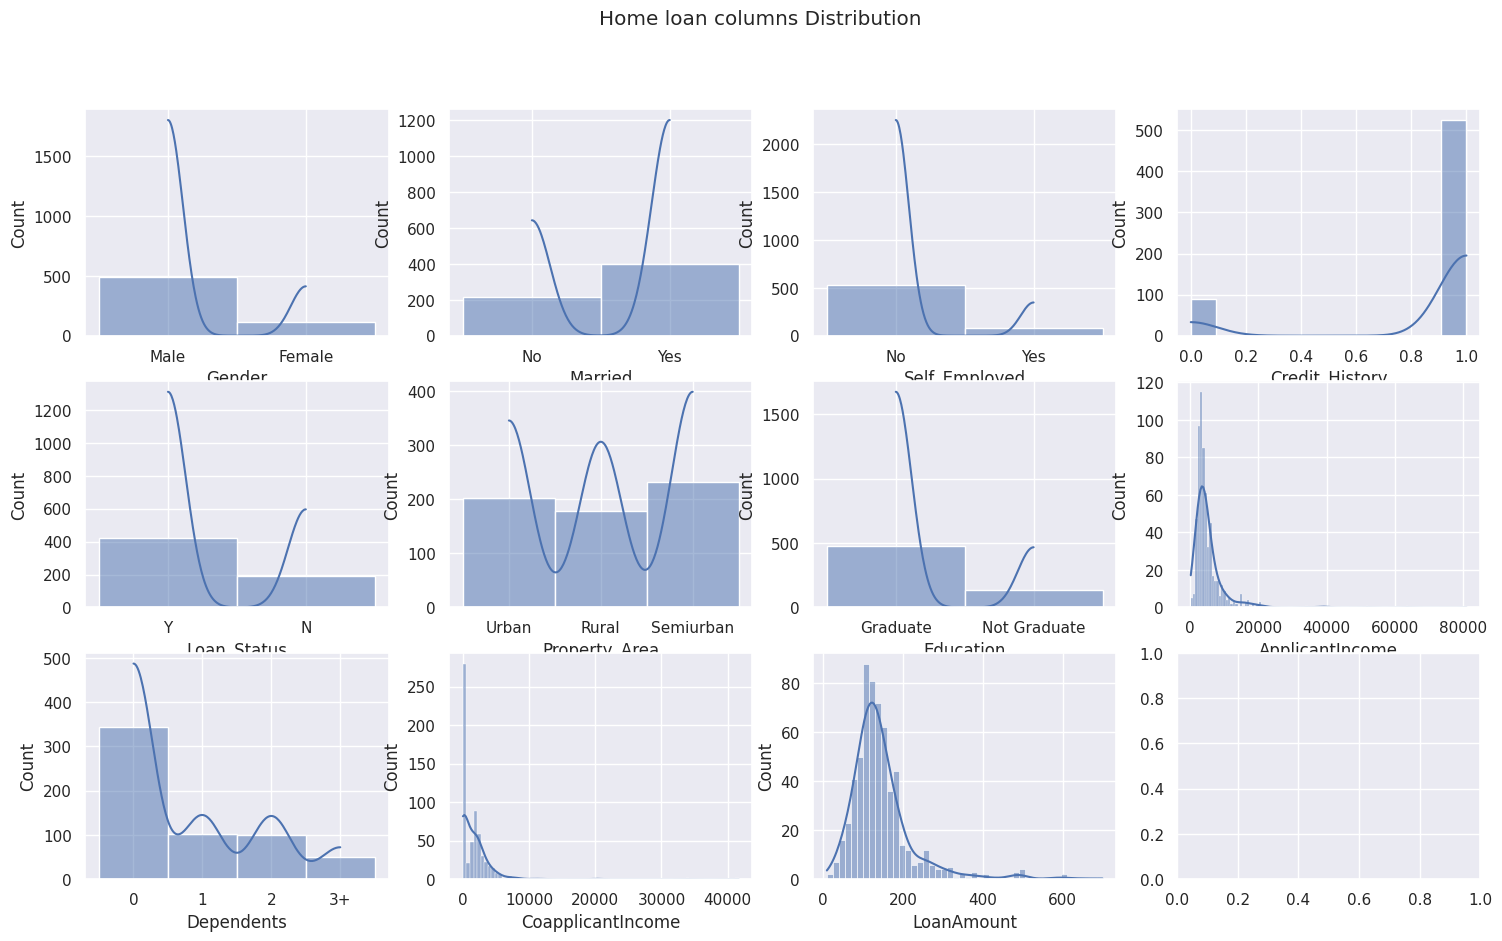

In [20]:

fig, axes = plt.subplots(3, 4, figsize=(18, 10))

fig.suptitle('Home loan columns Distribution')

sns.histplot(ax=axes[0, 0], data=train, x='Gender', kde = True)
sns.histplot(ax=axes[0, 1], data=train, x='Married', kde = True)
sns.histplot(ax=axes[0, 2], data=train, x='Self_Employed', kde = True)
sns.histplot(ax=axes[1, 0], data=train, x='Loan_Status', kde = True)
sns.histplot(ax=axes[1, 1], data=train, x='Property_Area', kde = True)
sns.histplot(ax=axes[1, 2], data=train, x='Education', kde = True)
sns.histplot(ax=axes[0, 3], data=train, x='Credit_History', kde = True)
sns.histplot(ax=axes[1, 3], data=train, x='ApplicantIncome', kde = True)
sns.histplot(ax=axes[2, 0], data=train, x='Dependents', kde = True)
sns.histplot(ax=axes[2, 1], data=train, x='CoapplicantIncome', kde = True)
sns.histplot(ax=axes[2, 2], data=train, x='LoanAmount', kde = True)

<Axes: xlabel='Education', ylabel='LoanAmount'>

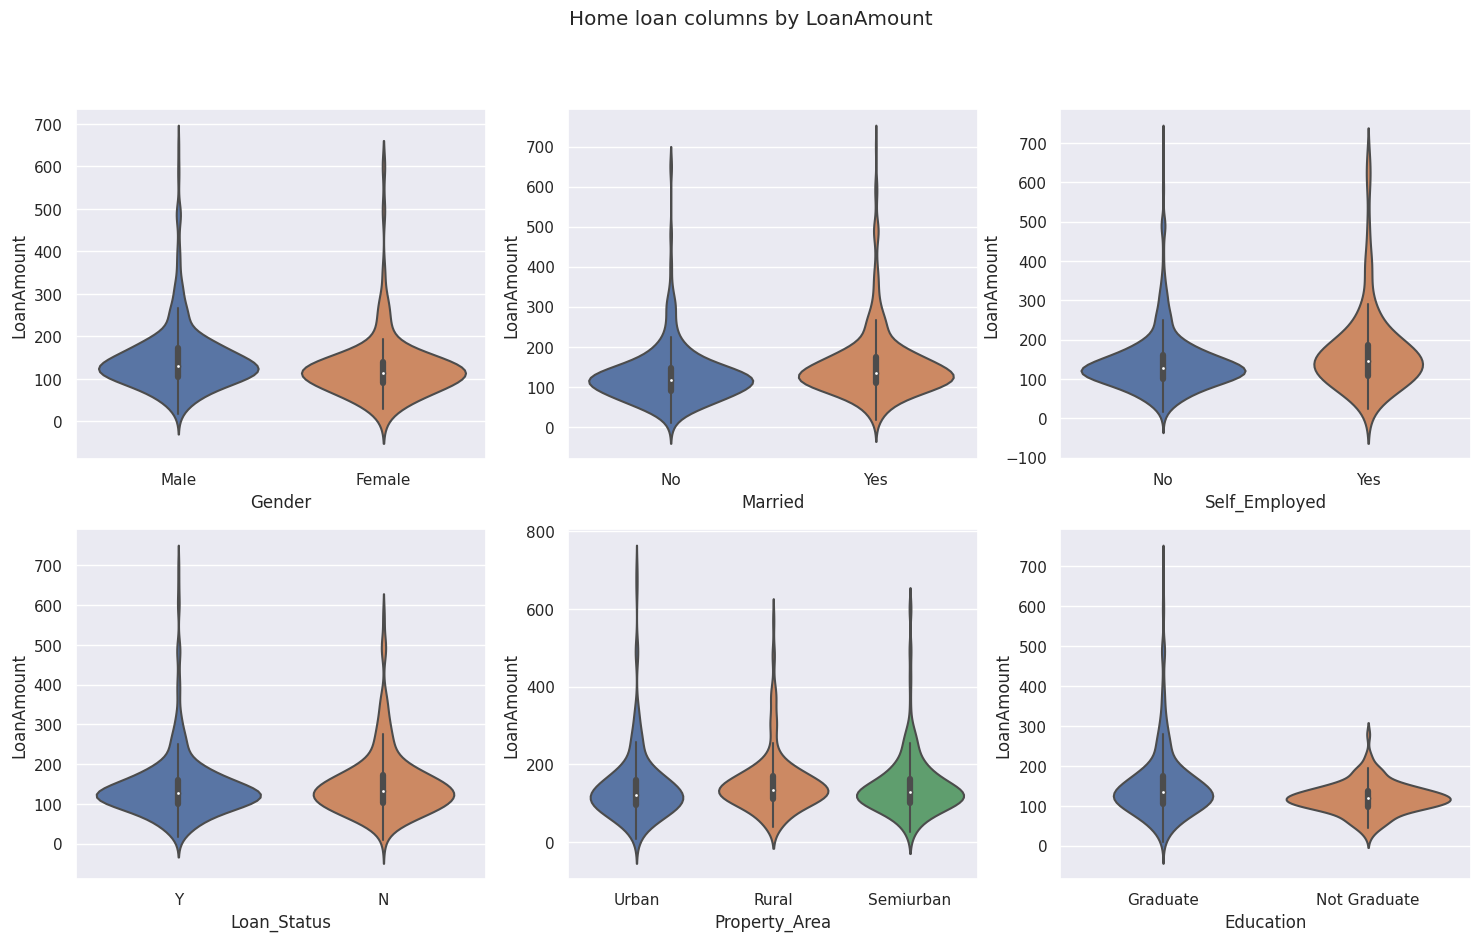

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Home loan columns by LoanAmount')

sns.violinplot(ax=axes[0, 0], data=train, x='Gender', y='LoanAmount')
sns.violinplot(ax=axes[0, 1], data=train, x='Married', y='LoanAmount')
sns.violinplot(ax=axes[0, 2], data=train, x='Self_Employed', y='LoanAmount')
sns.violinplot(ax=axes[1, 0], data=train, x='Loan_Status', y='LoanAmount')
sns.violinplot(ax=axes[1, 1], data=train, x='Property_Area', y='LoanAmount')
sns.violinplot(ax=axes[1, 2], data=train, x='Education', y='LoanAmount')

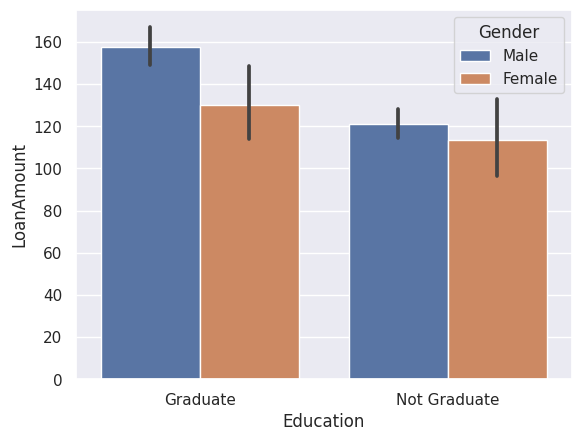

In [22]:
sns.barplot(x='Education', y ='LoanAmount', hue ='Gender', data = train);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

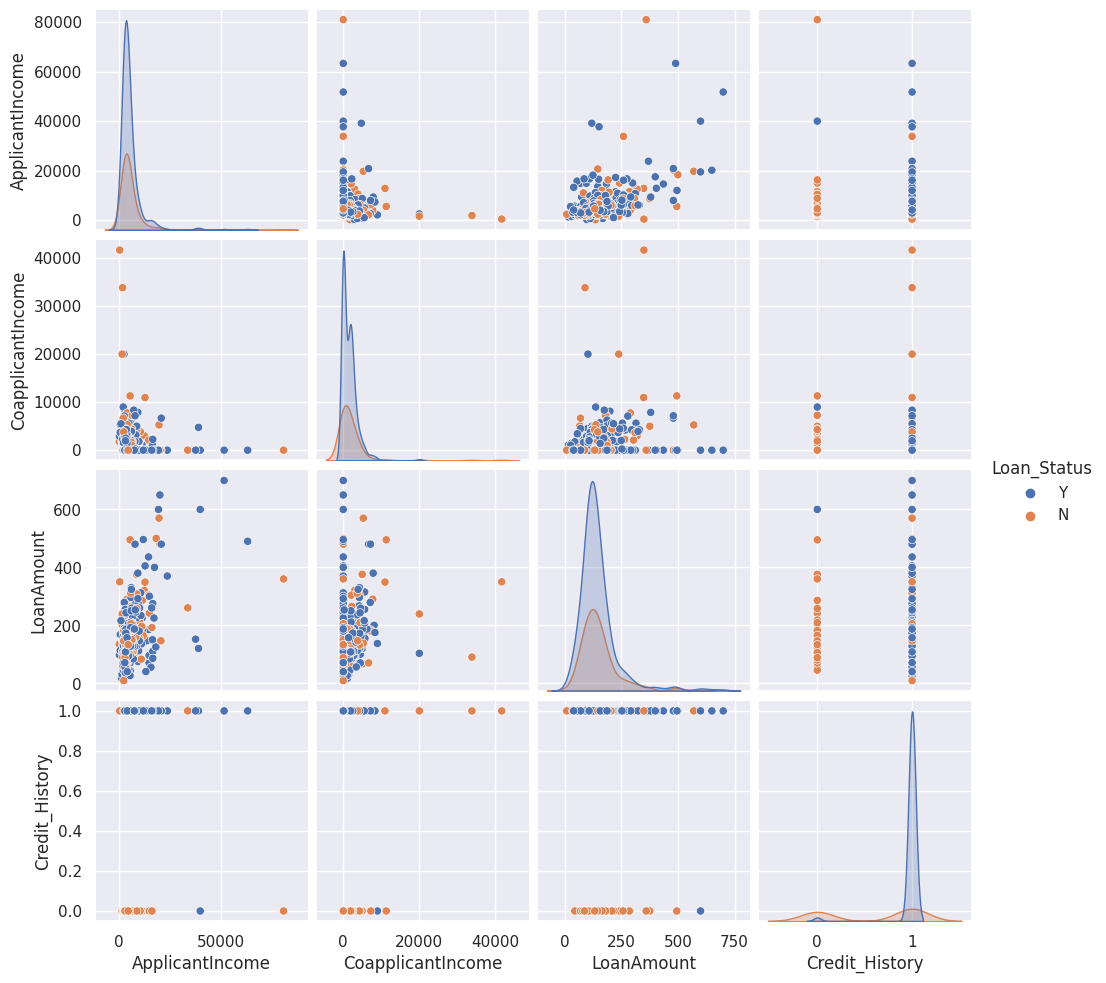

In [23]:
sns.pairplot(train,hue = 'Loan_Status')

In [24]:
train.replace({'Yes':1,'No':0},inplace = True)
train.replace({'Y':1,'N':0},inplace = True)
train.replace({'Graduate' : 1,'Not Graduate' : 0},inplace = True)
train.replace({'3+' : 3, '0':0, '1':1, '2':2},inplace = True)
dummy = pd.get_dummies(train['Gender'],prefix='Gender',drop_first=True)
train.drop('Gender',axis=1,inplace=True)
train = pd.concat([train,dummy],axis=1)
train.head(3)

/tmp/ipykernel_18/1242457267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace({'Yes':1,'No':0},inplace = True)
/tmp/ipykernel_18/1242457267.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace({'Y':1,'N':0},inplace = True)
/tmp/ipykernel_18/1242457267.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Gender_Male
0,0.0,0.0,1,0,5849,0.0,146.412162,1.0,Urban,1,True
1,1.0,1.0,1,0,4583,1508.0,128.000000,1.0,Rural,0,True
2,1.0,0.0,1,1,3000,0.0,66.000000,1.0,Urban,1,True


In [25]:
dummy1 = pd.get_dummies(train['Property_Area'],prefix = 'Property',drop_first=True)
train.drop('Property_Area',axis = 1,inplace = True)
train = pd.concat([train,dummy1],axis=1)
train.replace({True : 1,False : 0},inplace = True)
train.head(3)

/tmp/ipykernel_18/2220170949.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace({True : 1,False : 0},inplace = True)


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Gender_Male,Property_Semiurban,Property_Urban
0,0.0,0.0,1,0,5849,0.0,146.412162,1.0,1,1,0,1
1,1.0,1.0,1,0,4583,1508.0,128.000000,1.0,0,1,0,0
2,1.0,0.0,1,1,3000,0.0,66.000000,1.0,1,1,0,1


In [26]:
train = train.fillna(0)

In [27]:
features = train.drop(columns = 'Loan_Status', axis = 1)
label = train['Loan_Status'].copy()

numerical = features.select_dtypes(include=['int64', 'float64']).columns
categorical = features.select_dtypes(include=['object']).columns


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
pipscaling = ColumnTransformer(transformers=[('num', StandardScaler(), numerical),('cat', OneHotEncoder(), categorical)])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features , label, test_size= 0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
model = Pipeline(steps=[ ('pipscaling', pipscaling),('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=10000))])

model.fit(x_train, y_train)

Pipeline(steps=[('pipscaling',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Male', 'Property_Semiurban', 'Property_Urban'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=10000, penalty='l1',
                                    solver='saga'))])

In [28]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

